# Stage 1

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data_df = pd.read_csv("diamonds.csv")
data_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [45]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [46]:
print(data_df.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


So we don't have missing data but it seems here that the first column is only index so let's drop it

In [47]:
data_df = data_df.drop(["Unnamed: 0"], axis=1)
data_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


It seems strange to have some x, y, and z minimum values at 0. Indeed, if some of these values are null, it means that we have two-dimensional diamonds or even less. For logical reasons, we are going to remove data with such values.

In [48]:
#let's drop those 0 values point
data_df = data_df.drop(data_df[data_df["x"]==0].index)
data_df = data_df.drop(data_df[data_df["y"]==0].index)
data_df = data_df.drop(data_df[data_df["z"]==0].index)
data_df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


From this sort we have remove 20 points.

In [49]:
diamonds_above_5_carat = data_df[data_df["carat"] > 4]
diamonds_above_5_carat.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


Verification of diamond prices and dataset consistency: The maximum price appears relatively low, but we notice that the larger diamonds all seem to have relatively low prices. However, they are observed to have colors between I, J, and H, which are considered lower-quality colors. This makes the data consistent. (Validation with the RAPAPORT).


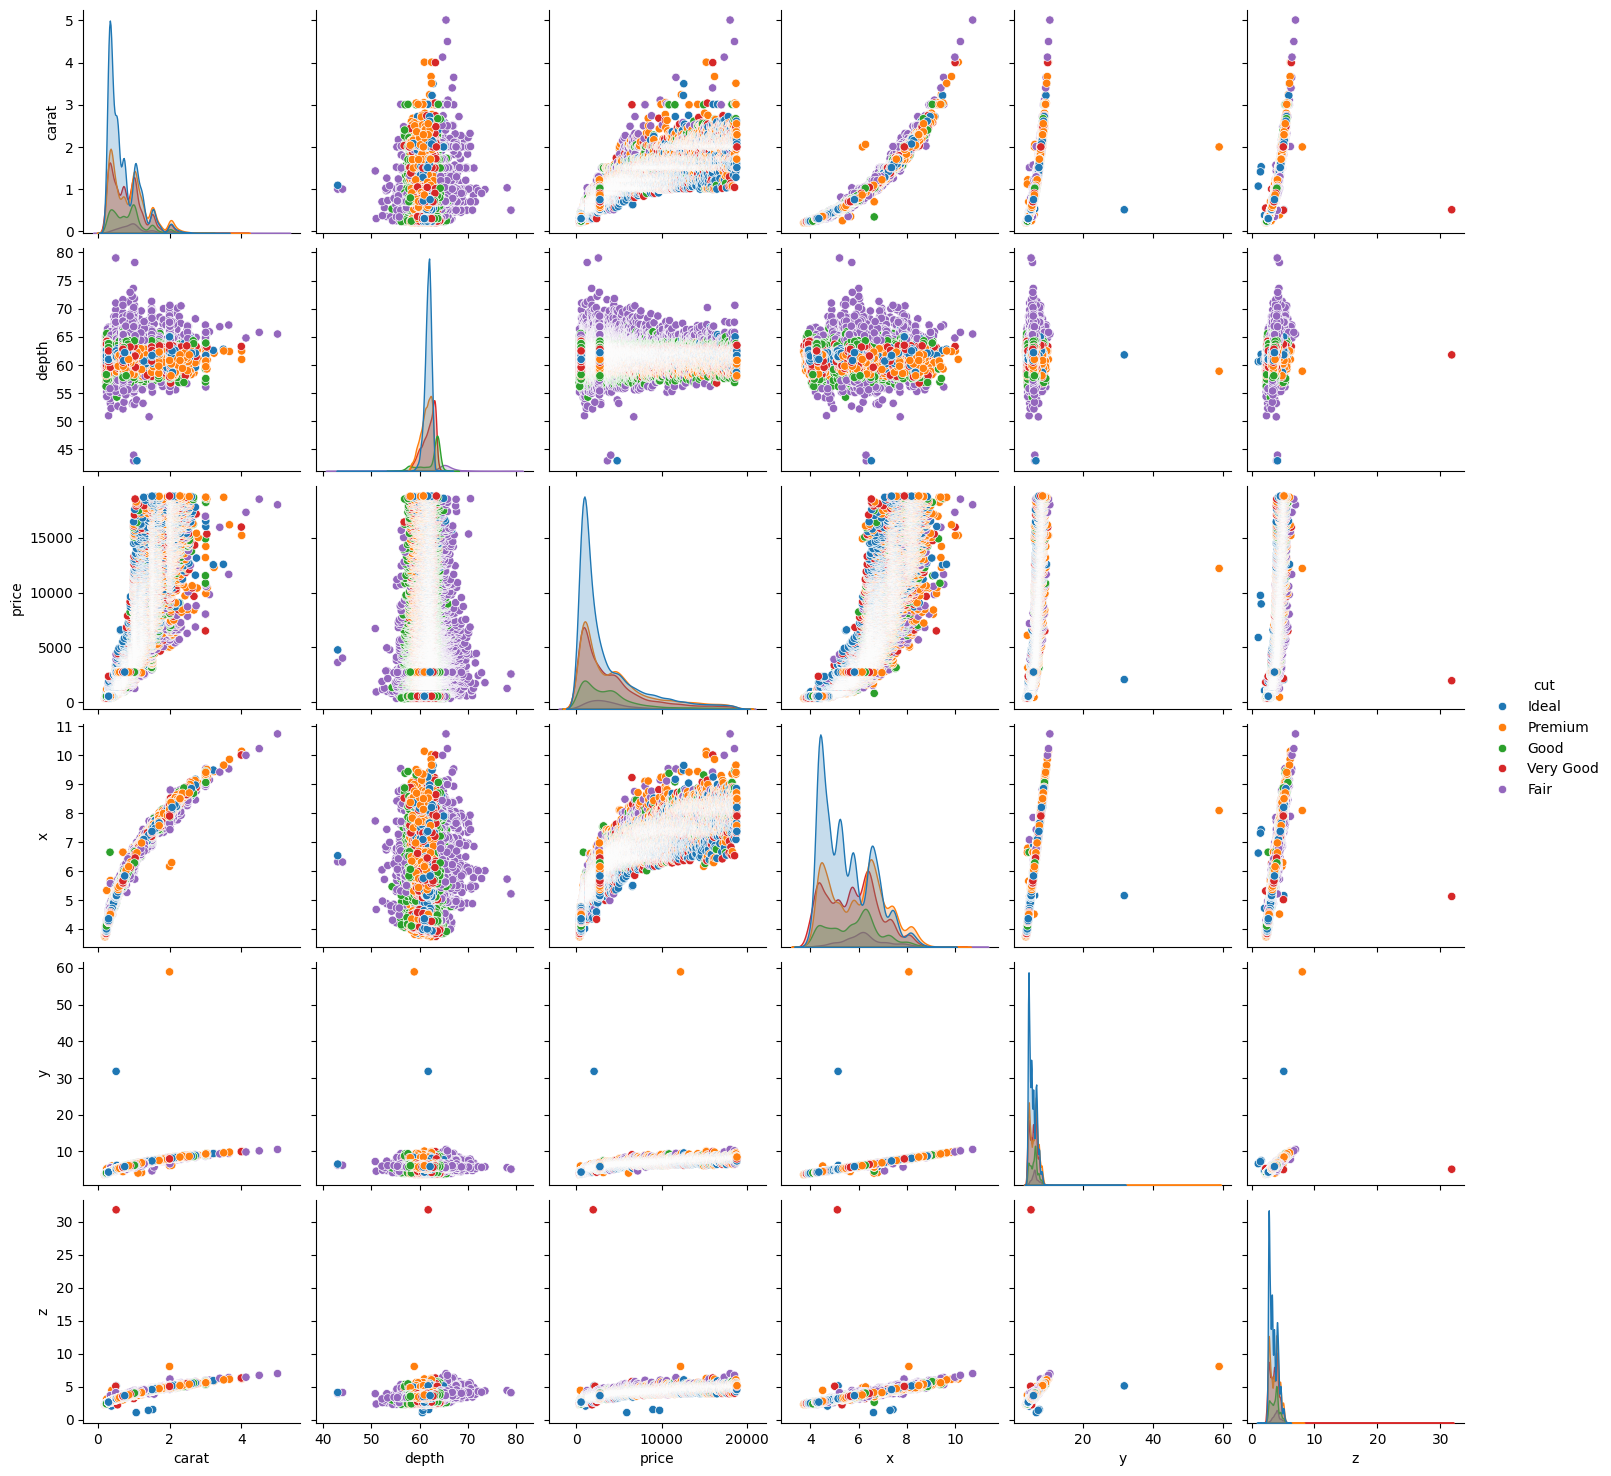

In [50]:
# Cette etape prend du temps en raison du nombre de graphe

columns_to_plot = ["carat", "depth", "price", "x", "y", "z", "cut"]
pairplot_data = data_df[columns_to_plot]
sns.pairplot(pairplot_data, hue="cut", diag_kind="kde", height=2.5)
plt.show()



Here are a few observations from the pair plots:

Some features contain data points that are significantly different from the rest of the dataset, which could impact the results of our regression model.

- The variables "y" and "z" have dimensional outliers in the dataset that need to be removed.

- The "depth" variable should likely be capped, but we need to inspect the regression line to confirm this.

- The "table" variable also appears to have outliers, so it should be capped as well.

Let's examine the regression plots to take a closer look at these outliers.

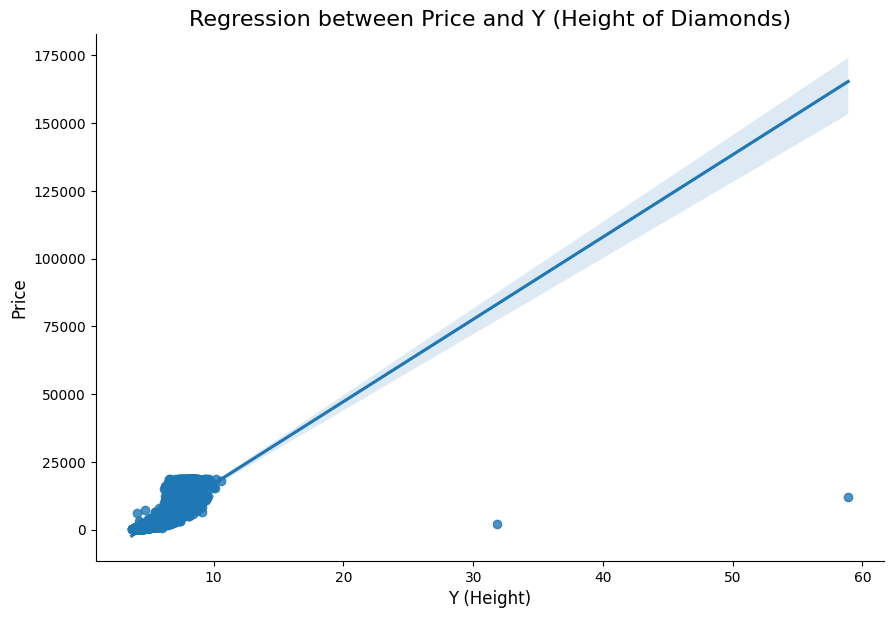

In [51]:
sns.lmplot(data=data_df, x="y", y="price", height=6, aspect=1.5)
plt.title("Regression between Price and Y (Height of Diamonds)", fontsize=16)
plt.xlabel("Y (Height)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()


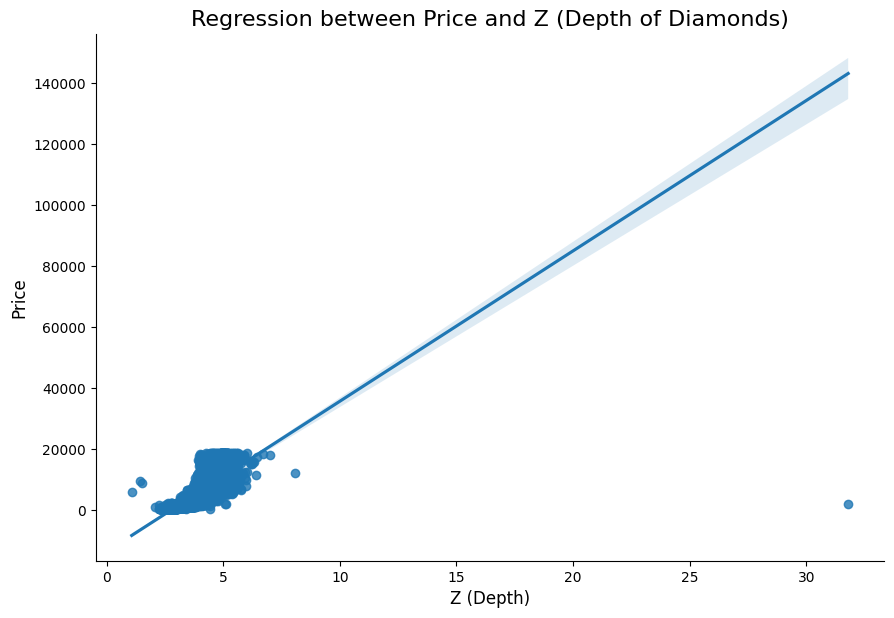

In [52]:
sns.lmplot(data=data_df, x="z", y="price", height=6, aspect=1.5)
plt.title("Regression between Price and Z (Depth of Diamonds)", fontsize=16)
plt.xlabel("Z (Depth)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

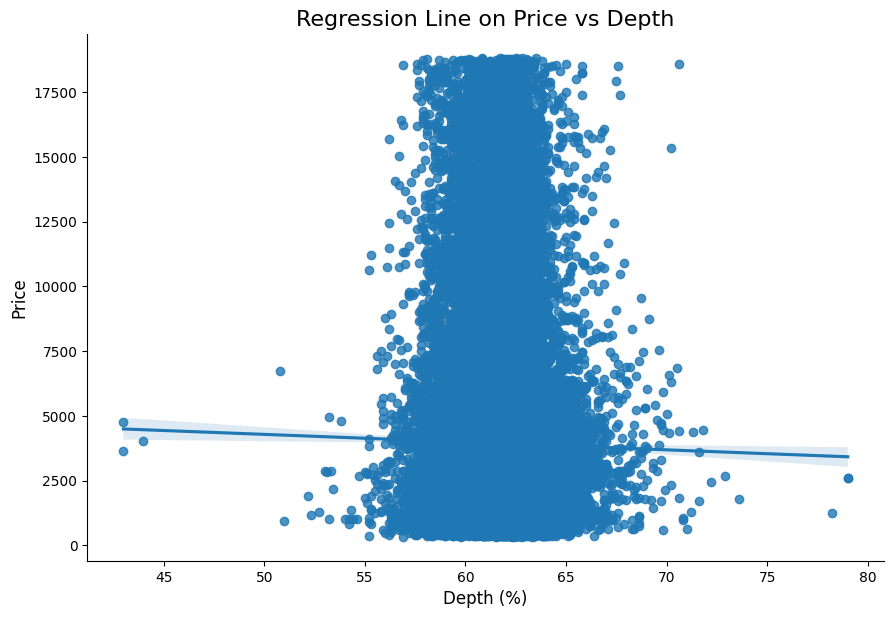

In [53]:
sns.lmplot(data=data_df, x="depth", y="price", height=6, aspect=1.5)
plt.title("Regression Line on Price vs Depth", fontsize=16)
plt.xlabel("Depth (%)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

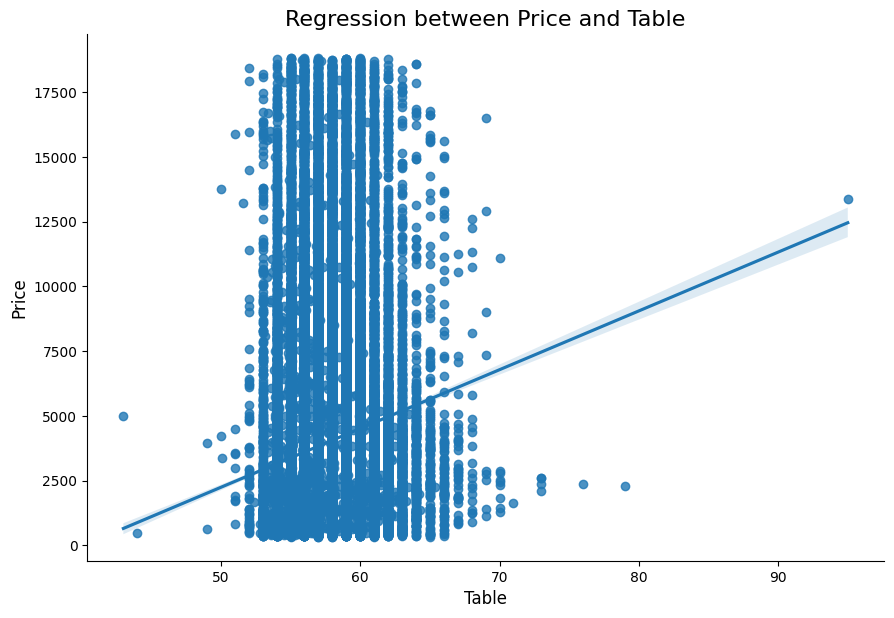

In [54]:
sns.lmplot(data=data_df, x="table", y="price", height=6, aspect=1.5)
plt.title("Regression between Price and Table", fontsize=16)
plt.xlabel("Table", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

In [55]:
data_df = data_df[(data_df["depth"] < 75) & (data_df["depth"] > 45)]
data_df = data_df[(data_df["table"] < 80) & (data_df["table"] > 40)]
data_df = data_df[(data_df["x"] < 30)]
data_df = data_df[(data_df["y"] < 30)]
data_df = data_df[(data_df["z"] < 30) & (data_df["z"] > 2)]
data_df.shape

(53907, 10)

So we have removed the data points that could have distorted  our models.


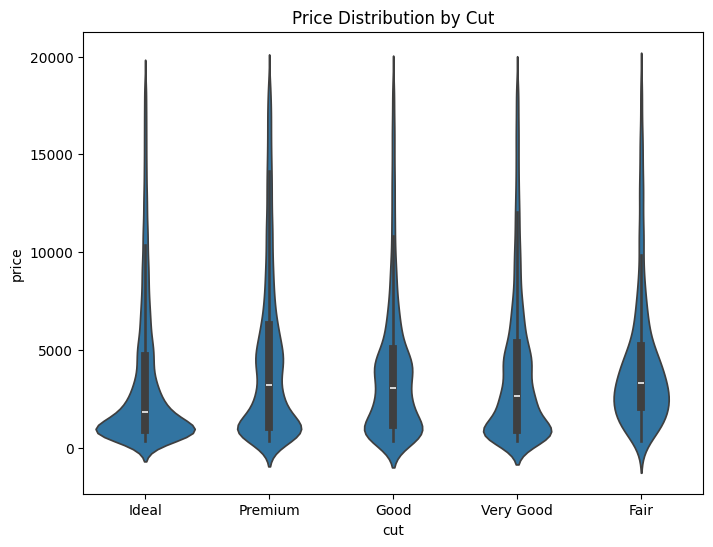

In [56]:
plt.figure(figsize=(8, 6))

sns.violinplot(x='cut', y='price', data=data_df)
plt.title('Price Distribution by Cut')
plt.show()

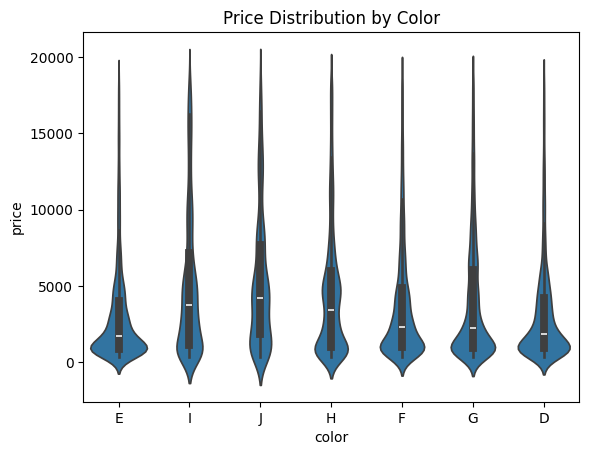

In [57]:
sns.violinplot(x='color', y='price', data=data_df)
plt.title('Price Distribution by Color')
plt.show()

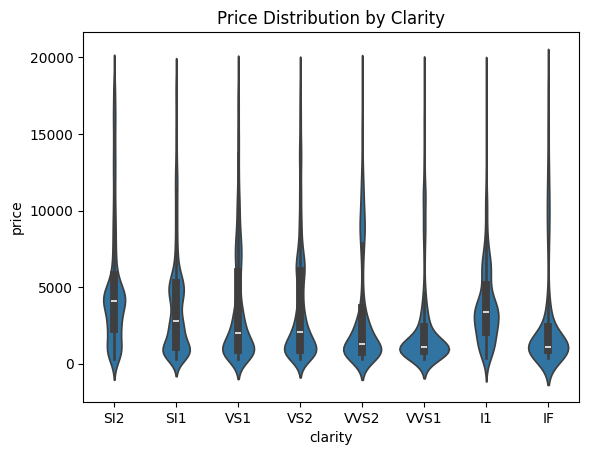

In [58]:
sns.violinplot(x='clarity', y='price', data=data_df)
plt.title('Price Distribution by Clarity')
plt.show()

In [59]:
data_df_copy = data_df.copy()


In [60]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_df_copy['cut'] = label_encoder.fit_transform(data_df_copy['cut'])
data_df_copy['color'] = label_encoder.fit_transform(data_df_copy['color'])
data_df_copy['clarity'] = label_encoder.fit_transform(data_df_copy['clarity'])
data_df_copy.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

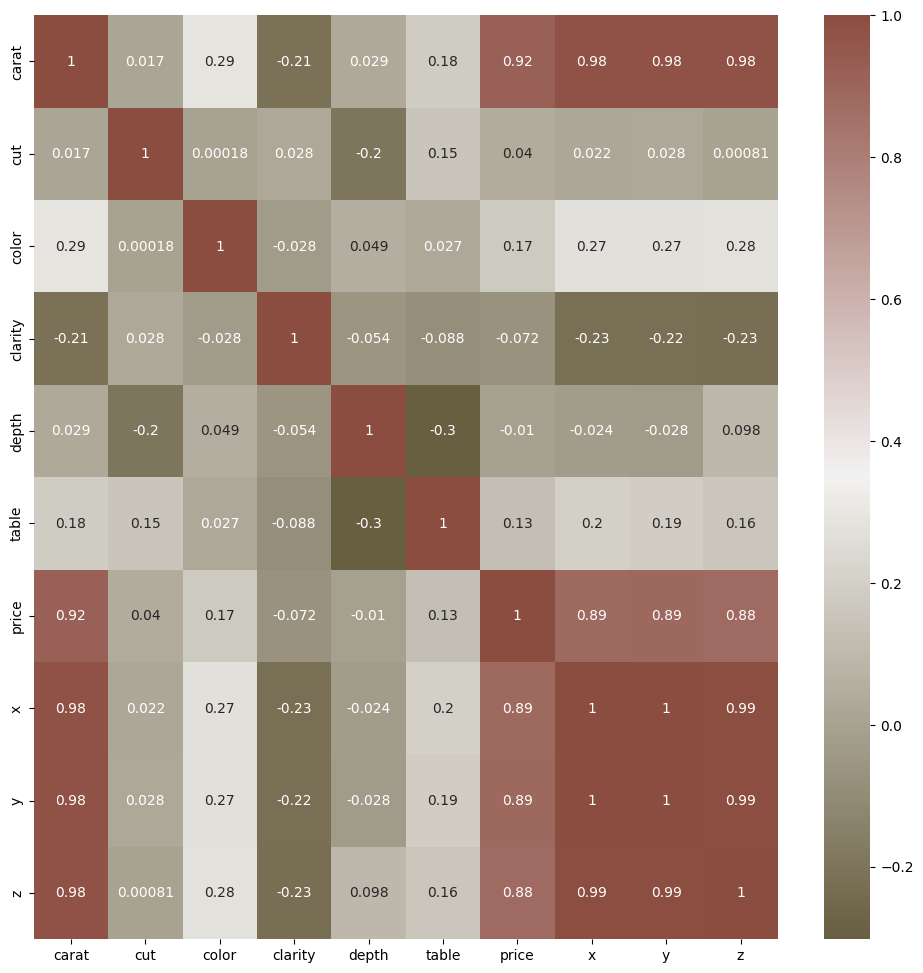

In [61]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= data_df_copy.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

We see the price seems corlated to carat, x, y and z

In general, we would expect a stronger relationship between the price and the color, or the price and the clarity of the diamonds. However, in this dataset, we only have diamonds of lower quality in terms of both color and clarity. As a result, there isn't a significant correlation, which suggests that our regression model may not be applicable to diamonds of higher quality.

In [62]:
from sklearn.model_selection import train_test_split

X = data_df_copy.drop(["price"], axis=1)
y = data_df_copy["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [64]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

R²: 0.8890
MAE: 849.3507
MSE: 1741183.6678


# Stage 2

In [72]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)


In [73]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.612e+10, tolerance: 6.455e+07
  model = cd_fast.enet_coordinate_descent(


In [74]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.666e+10, tolerance: 6.455e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.612e+10, tolerance: 6.455e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.108e+10, tolerance: 6.455e

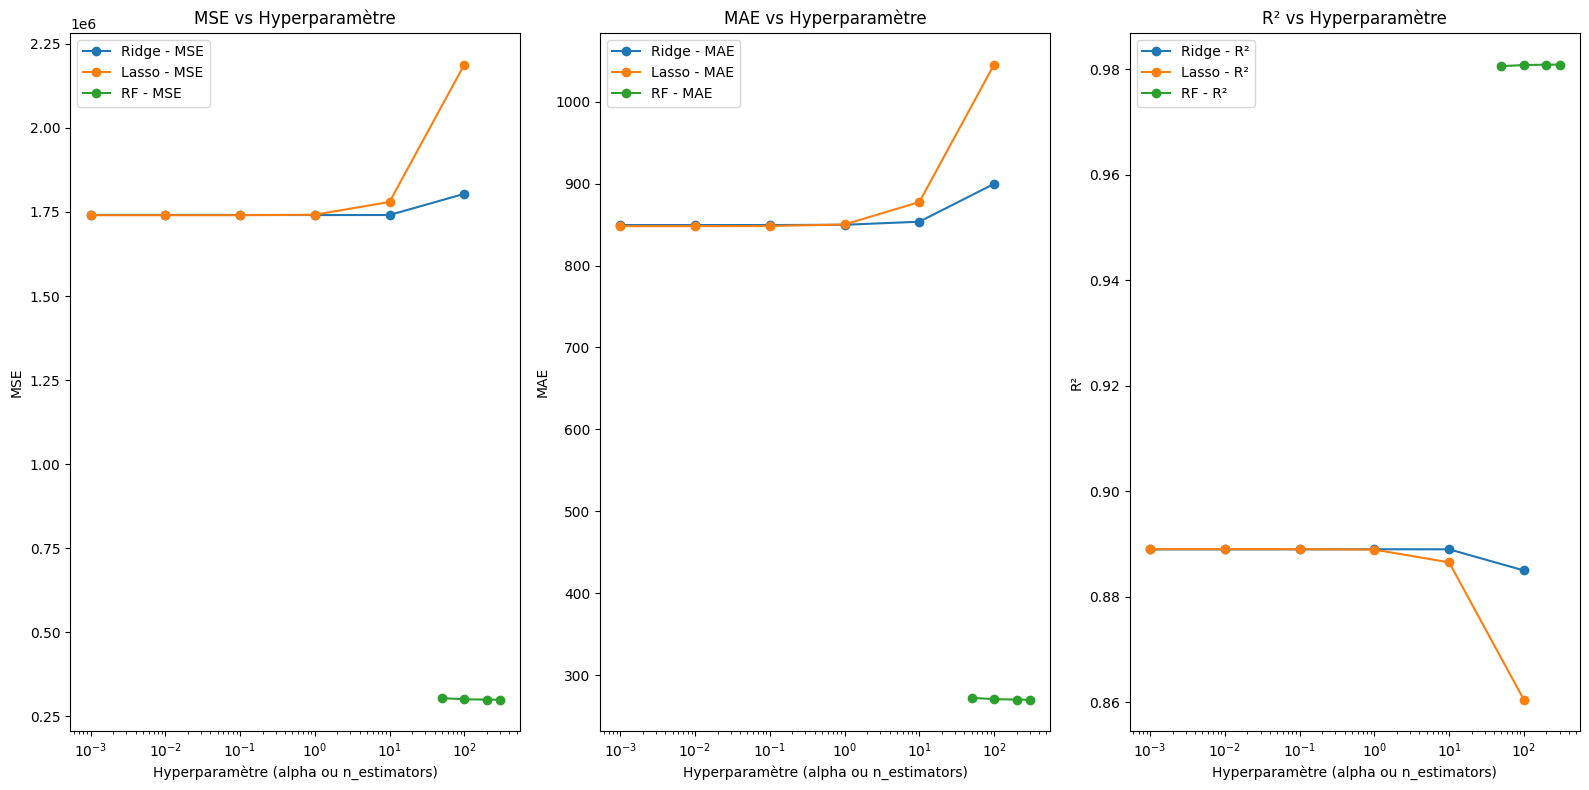

In [75]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Liste des hyperparamètres
alphas = [0.001, 0.01, 0.1, 1, 10, 100]  # Pour Ridge et Lasso
n_estimators_list = [50, 100, 200, 300]  # Pour Random Forest

# Stockage des résultats
ridge_results = {'param': [], 'MSE': [], 'MAE': [], 'R2': []}
lasso_results = {'param': [], 'MSE': [], 'MAE': [], 'R2': []}
rf_results = {'param': [], 'MSE': [], 'MAE': [], 'R2': []}

# Ridge Regression
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_pred = ridge_model.predict(X_test)

    mse = mean_squared_error(y_test, ridge_pred)
    mae = mean_absolute_error(y_test, ridge_pred)
    r2 = r2_score(y_test, ridge_pred)

    ridge_results['param'].append(alpha)
    ridge_results['MSE'].append(mse)
    ridge_results['MAE'].append(mae)
    ridge_results['R2'].append(r2)

# Lasso Regression
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_pred = lasso_model.predict(X_test)

    mse = mean_squared_error(y_test, lasso_pred)
    mae = mean_absolute_error(y_test, lasso_pred)
    r2 = r2_score(y_test, lasso_pred)

    lasso_results['param'].append(alpha)
    lasso_results['MSE'].append(mse)
    lasso_results['MAE'].append(mae)
    lasso_results['R2'].append(r2)

# Random Forest Regressor
for n_estimators in n_estimators_list:
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    mse = mean_squared_error(y_test, rf_pred)
    mae = mean_absolute_error(y_test, rf_pred)
    r2 = r2_score(y_test, rf_pred)

    rf_results['param'].append(n_estimators)
    rf_results['MSE'].append(mse)
    rf_results['MAE'].append(mae)
    rf_results['R2'].append(r2)

# Visualisation des résultats
plt.figure(figsize=(16, 8))

# MSE
plt.subplot(1, 3, 1)
plt.plot(ridge_results['param'], ridge_results['MSE'], label='Ridge - MSE', marker='o')
plt.plot(lasso_results['param'], lasso_results['MSE'], label='Lasso - MSE', marker='o')
plt.plot(rf_results['param'], rf_results['MSE'], label='RF - MSE', marker='o')
plt.xscale('log')
plt.xlabel('Hyperparamètre (alpha ou n_estimators)')
plt.ylabel('MSE')
plt.title('MSE vs Hyperparamètre')
plt.legend()

# MAE
plt.subplot(1, 3, 2)
plt.plot(ridge_results['param'], ridge_results['MAE'], label='Ridge - MAE', marker='o')
plt.plot(lasso_results['param'], lasso_results['MAE'], label='Lasso - MAE', marker='o')
plt.plot(rf_results['param'], rf_results['MAE'], label='RF - MAE', marker='o')
plt.xscale('log')
plt.xlabel('Hyperparamètre (alpha ou n_estimators)')
plt.ylabel('MAE')
plt.title('MAE vs Hyperparamètre')
plt.legend()

# R²
plt.subplot(1, 3, 3)
plt.plot(ridge_results['param'], ridge_results['R2'], label='Ridge - R²', marker='o')
plt.plot(lasso_results['param'], lasso_results['R2'], label='Lasso - R²', marker='o')
plt.plot(rf_results['param'], rf_results['R2'], label='RF - R²', marker='o')
plt.xscale('log')
plt.xlabel('Hyperparamètre (alpha ou n_estimators)')
plt.ylabel('R²')
plt.title('R² vs Hyperparamètre')
plt.legend()

plt.tight_layout()
plt.show()


For alpha values below 1, the model does not converge, and the results remain the same for both Lasso and Ridge regression. The results begin to differ when alpha reaches 10, but in all cases, Random Forest appears to be the better model here.

 However now, we will now focus on Random Forest to observe which number of estimators is ideal.

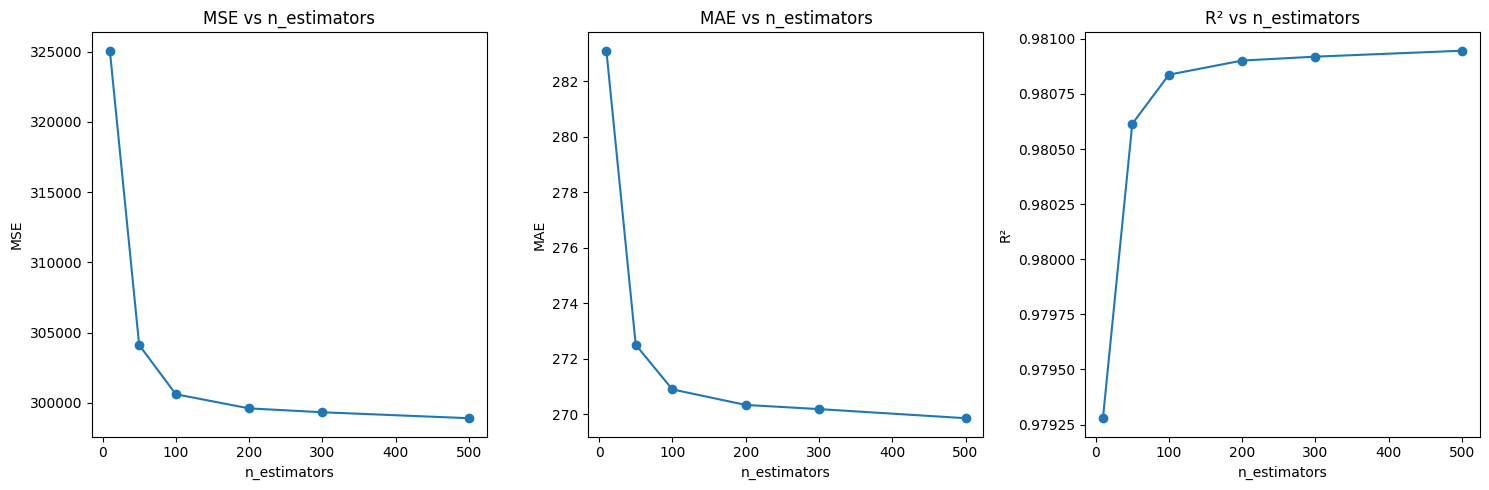

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Liste des valeurs de n_estimators à tester
n_estimators_range = [10, 50, 100, 200, 300, 500]

# Initialisation des listes pour stocker les résultats
mse_values = []
mae_values = []
r2_values = []

# Boucle pour tester différentes valeurs de n_estimators
for n in n_estimators_range:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)

    # Prédictions sur les données de test
    rf_pred = rf_model.predict(X_test)

    # Calcul des métriques
    mse = mean_squared_error(y_test, rf_pred)
    mae = mean_absolute_error(y_test, rf_pred)
    r2 = r2_score(y_test, rf_pred)

    # Stockage des résultats
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

# Visualisation des résultats
plt.figure(figsize=(15, 5))

# MSE vs n_estimators
plt.subplot(1, 3, 1)
plt.plot(n_estimators_range, mse_values, marker='o')
plt.title('MSE vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('MSE')

# MAE vs n_estimators
plt.subplot(1, 3, 2)
plt.plot(n_estimators_range, mae_values, marker='o')
plt.title('MAE vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('MAE')

# R² vs n_estimators
plt.subplot(1, 3, 3)
plt.plot(n_estimators_range, r2_values, marker='o')
plt.title('R² vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('R²')

plt.tight_layout()
plt.show()


From 200 repetitions onwards, the results converge. We will therefore choose this as the maximum value for the model tunning.

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

param_distributions = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

rf_best_model = random_search.best_estimator_

rf_pred = rf_best_model.predict(X_test)

mse = mean_squared_error(y_test, rf_pred)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print(f"Best Parameters: {best_params}")
print(f"Best CV Score (MSE): {best_score}")
print(f"MSE on Test Set: {mse}")
print(f"MAE on Test Set: {mae}")
print(f"R² on Test Set: {r2}")


Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20}
Best CV Score (MSE): -296035.900778847
MSE on Test Set: 299739.1801461029
MAE on Test Set: 271.436089031366
R² on Test Set: 0.9808935149254882


In [82]:
rf_best_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features=None,
    random_state=42
)

rf_best_model.fit(X_train, y_train)

rf_pred = rf_best_model.predict(X_test)

mse = mean_squared_error(y_test, rf_pred)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print(f"MSE on Test Set: {mse}")
print(f"MAE on Test Set: {mae}")
print(f"R² on Test Set: {r2}")


MSE on Test Set: 299739.1801461029
MAE on Test Set: 271.436089031366
R² on Test Set: 0.9808935149254882


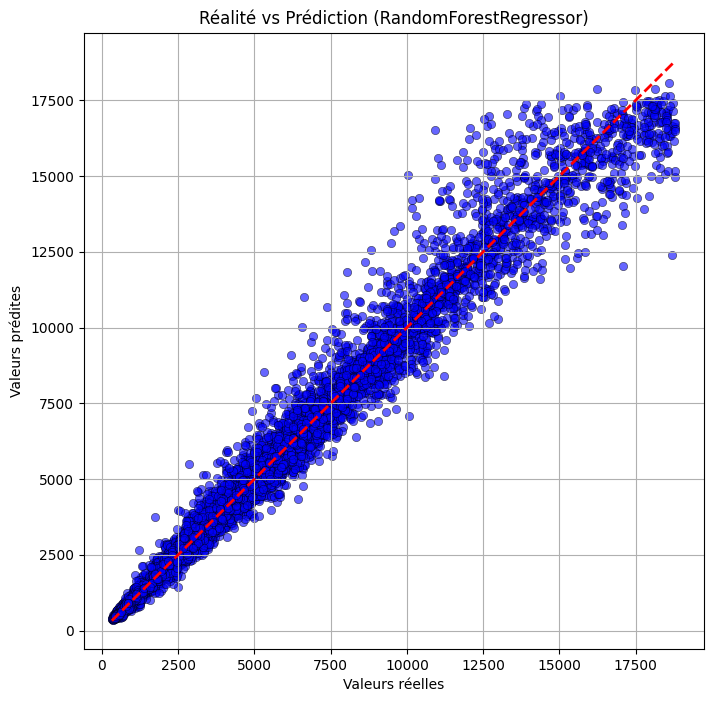

In [83]:

def plot_reality_vs_prediction(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue", edgecolor="k")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Valeurs prédites")
    plt.title(f"Réalité vs Prédiction ({model_name})")
    plt.grid()
    plt.show()

rf_pred = rf_best_model.predict(X_test)

plot_reality_vs_prediction(y_test, rf_pred, "RandomForestRegressor")
